In [ ]:
# Homework 4 in course 71254 (HUJI) - Yedidya Harris, 11/2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io as io
from skimage.feature import greycomatrix, greycoprops
from skimage import data
from skimage.color import rgb2gray

In [2]:
def glcm_image(path="garden.jpg"):
    

    
    PATCH_SIZE = 21
    # opening the image
    image_raw = io.imread(path, as_gray=True)
    io.imshow(image_raw)
    #image = rgb2gray(image_raw)
    image = skimage.img_as_ubyte(image_raw)

    io.imshow(image)

    # selecting some patches from grass area of the image
    grass_locations = [(600, 200), (700, 400), (700, 200), (700, 450)]
    grass_patches = []
    for loc in grass_locations:
        grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                                   loc[1]:loc[1] + PATCH_SIZE])


    # selecting some patches from plants area of the image
    plants_locations = [(300, 200), (400, 200), (250, 100), (300, 300)]
    plants_patches = []
    for loc in plants_locations:
        plants_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                                 loc[1]:loc[1] + PATCH_SIZE])

    # compute GLCM info on each patch
    # skimage.feature.texture.greycomatrix(image, distances, angles, levels=256, symmetric=False, normed=False)
    xs = []
    ys = []
    for patch in (grass_patches + plants_patches):
        glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
        xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
        ys.append(greycoprops(glcm, 'correlation')[0, 0])


    # creating the figure
    fig = plt.figure(figsize=(8, 8))    

    # display original image with locations of patches
    ax = fig.add_subplot(3, 2, 1)
    ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest',
              vmin=0, vmax=255)
    for (y, x) in grass_locations:
        ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
    for (y, x) in plants_locations:
        ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
    ax.set_xlabel('Original Image')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('image')
    # end of display original image with locations of patches

    # for each patch, plot (dissimilarity, correlation)
    ax = fig.add_subplot(3, 2, 2)
    ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
            label='Grass')
    ax.plot(xs[len(plants_patches):], ys[len(plants_patches):], 'bo',
            label='Plants')
    ax.set_xlabel('GLCM Dissimilarity')
    ax.set_ylabel('GLVM Correlation')
    ax.legend()

    # display the image patches
    for i, patch in enumerate(grass_patches):
        ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
        ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
                  vmin=0, vmax=255)
        ax.set_xlabel('Grass %d' % (i + 1))
        
# Homework 4 in course 71254 (HUJI) - Yedidya Harris, 11/2021

    for i, patch in enumerate(plants_patches):
        ax = fig.add_subplot(3, len(plants_patches), len(plants_patches)*2 + i + 1)
        ax.imshow(patch, cmap=plt.cm.gray, interpolation='nearest',
                  vmin=0, vmax=255)
        ax.set_xlabel('Plants %d' % (i + 1))


    # display the patches and plot
    fig.suptitle('GLCM features', fontsize=14)
    plt.show()


In [3]:
# Function that gets (x,y) values of a pixel in the image, and prints if it's the grass or plants
def grass_or_plants (a=0, b=0, path="garden.jpg"):
    
    PATCH_SIZE = 21
    # opening the image
    image_raw = io.imread(path, as_gray=True)
    image = skimage.img_as_ubyte(image_raw)
    
    print ("Find out if the pixel is a door or the wall:")
    io.imshow(image)
    plt.show()
    
    if a == 0 and b == 0:
        a = int(input("Enter the x value of the pixel to examine: "))
        b = int(input("Enter the y value of the pixel to examine: "))
    
    # the following lines generate a patch (for the given pixel) and calc the GLCM
    locations = [(a,b)]
    patches = []
    for loc in locations:
        patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                                   loc[1]:loc[1] + PATCH_SIZE])
    xs = []
    ys = []
    for patch in (patches):
        glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
        xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
        ys.append(greycoprops(glcm, 'correlation')[0, 0])    
        
# Homework 4 in course 71254 (HUJI) - Yedidya Harris, 11/2021        
        
    print ("The dissimilarity value is:", xs)    
    print ("The correlation value is:", ys, "\n")
    
    # check if the GLCM properties suit the grass or the plants (based on the scatter plot above)
    for x in xs:
        for y in ys:
            if x < 35 and y < 0.15:
                print("It's the grass!")
            if x > 32 or y > 0.2:
                print("It's the plants!")
                

        

In [ ]:
# initializing GLCM on our image
glcm_image()

In [ ]:

# Examinging multiple pixels one after another (user input)
while True:
    grass_or_plants()
    input("Press Enter to continue...")
    
    
# IMPORTANT: if you think the function is not working, please restart the kernel (since it's waiting for user input)

Find out if the pixel is a door or the wall:


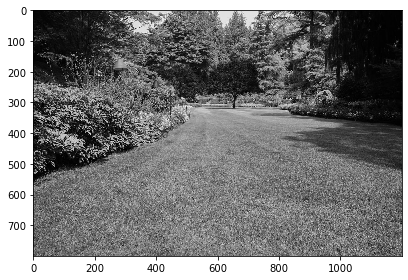

The dissimilarity value is: [21.4375]
The correlation value is: [-0.04056811462543508] 

It's the grass!


In [4]:
# Examinging a specific pixel
grass_or_plants(500, 600)